**1**. (100 points)

Implement the Drossel and Schwabl forest fire model using the [description](https://en.wikipedia.org/wiki/Forest-fire_model#/media/File:Forest_fire_model.gif) from Wikipedia. Your final solution should be similar to the video `forest_fire.mp4` in the homework folder.

```
The model is defined as a cellular automaton on a grid with Ld cells. L is the sidelength of the grid and d is its dimension. A cell can be empty, occupied by a tree, or burning. The model of Drossel and Schwabl (1992) is defined by four rules which are executed simultaneously:
A burning cell turns into an empty cell
A tree will burn if at least one neighbor is burning
A tree ignites with probability f even if no neighbor is burning
An empty space fills with a tree with probability p
```

- Parameters for the simulation are
```python
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps
```
- You need to write code create an array named `sim` with shape (steps, n, n)
- **Note**: Your code should make use of `numpy` optimizations as much as possible - the simulation itself takes less than a second to complete on my fairly old desktop
- Now create a plot as shown from the `sims` array
![](./forest_fire.png)
- Code to display an animation of the `sims` array is provided
- Your animation should be similar to the one shown

Hints:

- For simplicity, assume that the borders of the simulation grid are fixed so they are always empty (the borders are *outside* the 100 by 100 grid you are saving at each step.
- Use marginalization to get the required numbers for the plot of population sizes over time
- Use *views* liberally - they do not incur the cost of a copy


In [1]:
from IPython.display import Video

Video("forest_fire.mp4")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
np.random.seed(123)

In [ ]:
EMPTY, TREE, BURN = 0, 1, 2

In [449]:
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [475]:
%%time

#np.random.seed(1234)

sim = np.zeros( (steps, n+2, n+2), dtype=np.int )
msk = np.ones((n, n))
msk = np.pad(msk, pad_width=1, mode='constant', constant_values=0)

for s in range(steps-1):
    # direction slices
    center = sim[s, 1:-1, 1:-1]
    north  = sim[s, :-2, 1:-1]
    south  = sim[s, 2:, 1:-1]
    east   = sim[s, 1:-1, 2:]
    west   = sim[s, 1:-1, :-2]
    neast  = sim[s, :-2, 2:]
    nwest  = sim[s, :-2, :-2]
    seast  = sim[s, 2:, 2:]
    swest  = sim[s, :-2, :-2]

    # stack cells that neighbor corresponding center cell
    neighbors = np.dstack([north, south, east, west, neast, nwest, seast, swest])

    # find burning cells
    no_burn = np.where(center == BURN)

    # find trees that will burn
    to_burn = np.where(
        (center == TREE) & (
            np.any(neighbors == BURN, axis=2)
            | (np.all(neighbors != BURN, axis=2) & (np.random.random(center.shape) < f))
        )
    )

    # find empty cells that grow trees
    to_tree = np.where(np.random.random(center.shape) < p)

    center[no_burn] = EMPTY
    center[to_burn] = BURN
    center[to_tree] = TREE
    sim[s+1, 1:-1, 1:-1] = center

Wall time: 486 ms


Text(0.5, 1.0, 'Forest Fire Simulation')

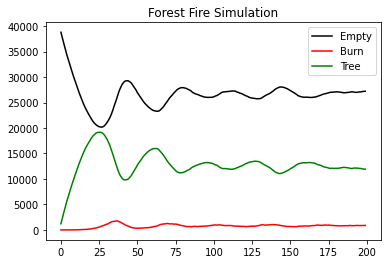

In [464]:
# Your code to make the first plot here

# count cell types
time_steps = range(steps)
burn_sum = np.sum(sim == BURN, axis=(1, 2))
tree_sum = np.sum(sim == TREE, axis=(1, 2))
empty_sum = n * n - burn_sum - tree_sum

plt.plot(time_steps, empty_sum, 'k')
plt.plot(time_steps, burn_sum, 'r')
plt.plot(time_steps, tree_sum, 'g')
plt.legend(['Empty', 'Burn', 'Tree'])
plt.title("Forest Fire Simulation")

# Check movie

If your `sim` array is correct, the animation will play upon execution. It takes a bit of time (< 1 minute) to genreate the animation and render to HTML.

In [466]:
%%capture

fig = plt.figure(figsize=(6,6))
im = plt.imshow(sim[0], cmap=ListedColormap(['black', 'green', 'red']), vmin=0, vmax=2)

def updatefig(j):
    im.set_array(sim[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=range(steps), 
                              interval=50, blit=True);

In [467]:
%%time

HTML(ani.to_jshtml())

Wall time: 12.2 s


To write to file if you have ffmpeg instaled

```python 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('forest_fire.mp4', writer=writer)
```